In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, GRU, LSTM, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt
import seaborn as sns

         week offense_type  Total_Crimes
0  2006-12-31        total           692
1  2007-01-07        total           704
2  2007-01-14        total           692
3  2007-01-21        total           614
4  2007-01-28        total           658


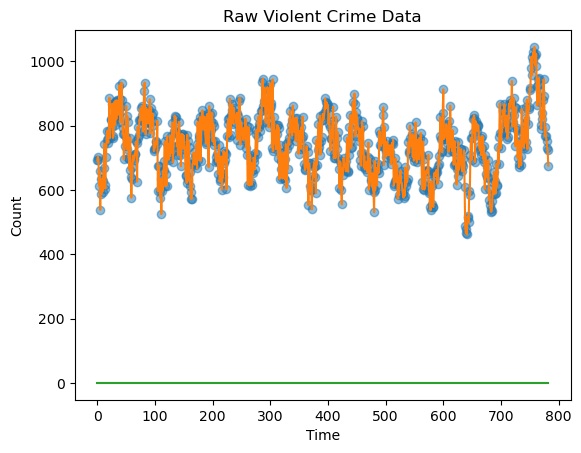

In [4]:
df = pd.read_csv("./dataset/crimedata_week.csv")
df.drop('offense_type', axis = 1)
print(df.head())

df = df.rename(columns={"week": "t", "Total_Crimes": "y"})
df = df[["t","y"]]

t=np.array([*range(0,df.shape[0])])
x=np.array(df['y']).reshape(t.shape[0],1)
feature_columns=[0] # columns to use as features
target_columns=[0]  # columns to use as targets


fig, ax = plt.subplots()
for i in range(0,x.shape[1]):
    ax.plot(t, x[:,i],'o',alpha = 0.5)
    ax.plot(t, x[:,i],"-")
ax.plot(t, 0*x[:,0],"-") # add baseline for reference 
ax.set_title("Raw Violent Crime Data")  
ax.set_xlabel("Time")                  
ax.set_ylabel("Count")  
plt.show()

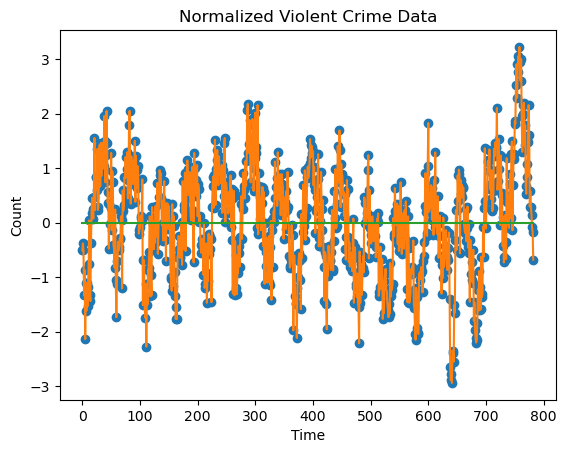

In [5]:
x=(x-np.mean(x,axis=0))/np.std(x,axis=0)

# visualize normalized data 
fig, ax = plt.subplots()
for i in range(0,x.shape[1]):
    ax.plot(t, x[:,i],'o')
    ax.plot(t, x[:,i],"-")
ax.plot(t, 0*x[:,0],"-") # add baseline for reference 
ax.set_title("Normalized Violent Crime Data")  
ax.set_xlabel("Time")                  
ax.set_ylabel("Count") 
plt.show()

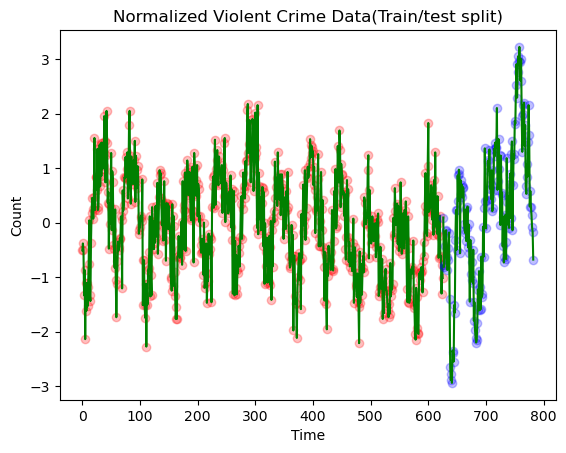

In [6]:
split_fraction=0.8
cut=int(split_fraction*x.shape[0]) 
tt=t[0:cut]; xt=x[0:cut]
tv=t[cut:]; xv=x[cut:]

# visualize normalized data 
fig, ax = plt.subplots()
for i in range(0,x.shape[1]):
    ax.plot(tt, xt[:,i],'ro',alpha=0.25)
    ax.plot(tt, xt[:,i],"g-")
for i in range(0,x.shape[1]):
    ax.plot(tv, xv[:,i],'bo',alpha=0.25)
    ax.plot(tv, xv[:,i],"g-")
ax.set_title("Normalized Violent Crime Data(Train/test split)")  
ax.set_xlabel("Time")                  
ax.set_ylabel("Count") 
plt.show()

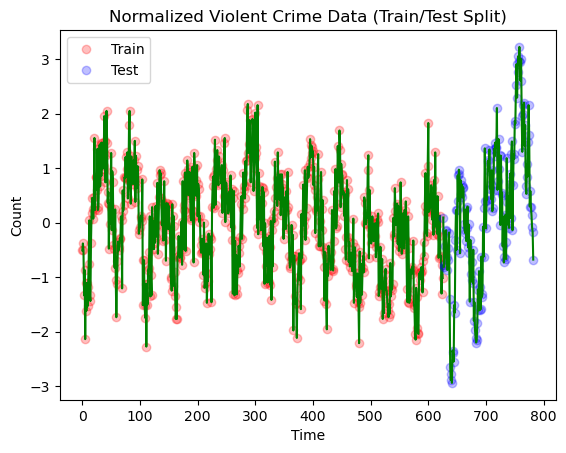

In [7]:
split_fraction = 0.8
cut = int(split_fraction * x.shape[0])
tt = t[0:cut]; xt = x[0:cut]
tv = t[cut:]; xv = x[cut:]

fig, ax = plt.subplots()
for i in range(0, x.shape[1]):
    ax.plot(tt, xt[:,i], 'ro', alpha=0.25, label="Train" if i == 0 else "")
    ax.plot(tt, xt[:,i], "g-")
for i in range(0, x.shape[1]):
    ax.plot(tv, xv[:,i], 'bo', alpha=0.25, label="Test" if i == 0 else "")
    ax.plot(tv, xv[:,i], "g-")

ax.set_title("Normalized Violent Crime Data (Train/Test Split)")  
ax.set_xlabel("Time")                  
ax.set_ylabel("Count") 

handles, labels = ax.get_legend_handles_labels()
# We filter handles and labels to remove duplicates
unique_labels = list(dict.fromkeys(labels))  # Using dict to preserve order
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels, loc="best")

plt.show()

indice range: 0 25 --> 26
[[ 0.60089283]
 [ 0.83342596]
 [ 0.84399565]
 [ 0.23095375]
 [ 1.55216473]
 [ 0.47405657]
 [ 0.07240844]
 [ 0.24152344]
 [ 0.4529172 ]
 [ 0.16753563]
 [-0.38208814]
 [-1.43905692]
 [-1.32279036]
 [ 0.04069937]
 [-0.7625969 ]
 [-1.17481473]
 [-1.53418411]
 [-1.1113966 ]
 [-1.61874162]
 [-1.1113966 ]
 [-2.13665632]
 [-0.86829378]
 [-1.33336004]
 [-0.50892439]
 [-0.38208814]
 [-0.50892439]] --> [1.35134066]
shape: (26, 1) --> (1,)


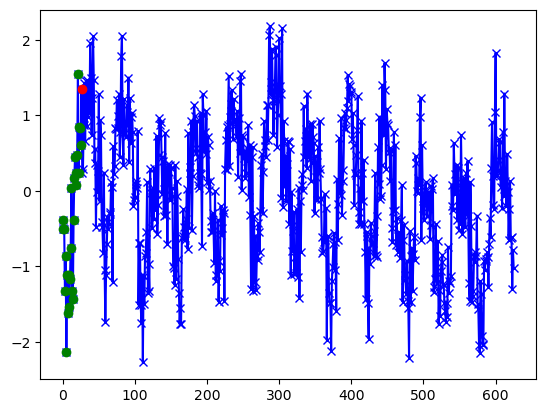

indice range: 1 26 --> 27
[[ 1.35134066]
 [ 0.60089283]
 [ 0.83342596]
 [ 0.84399565]
 [ 0.23095375]
 [ 1.55216473]
 [ 0.47405657]
 [ 0.07240844]
 [ 0.24152344]
 [ 0.4529172 ]
 [ 0.16753563]
 [-0.38208814]
 [-1.43905692]
 [-1.32279036]
 [ 0.04069937]
 [-0.7625969 ]
 [-1.17481473]
 [-1.53418411]
 [-1.1113966 ]
 [-1.61874162]
 [-1.1113966 ]
 [-2.13665632]
 [-0.86829378]
 [-1.33336004]
 [-0.50892439]
 [-0.38208814]] --> [0.23095375]
shape: (26, 1) --> (1,)


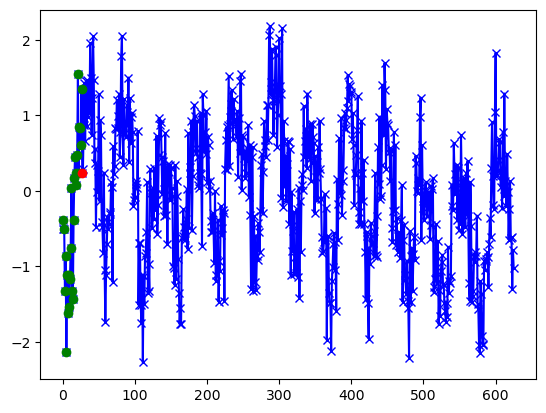

indice range: 0 25 --> 26
[[ 0.86513502]
 [ 0.23095375]
 [-0.49835471]
 [ 0.23095375]
 [-0.31867001]
 [-1.65045068]
 [-1.51304474]
 [-2.54887414]
 [-2.39032883]
 [-2.34805008]
 [-2.93995259]
 [-2.77083759]
 [-2.88710415]
 [-2.65457102]
 [-1.39677817]
 [-0.18126407]
 [-0.46664564]
 [-0.6780394 ]
 [-0.86829378]
 [-0.62519096]
 [-0.13898532]
 [-0.14955501]
 [-0.43493658]
 [-0.77316659]
 [-0.81544534]
 [ 0.09354781]] --> [0.40006876]
shape: (26, 1) --> (1,)


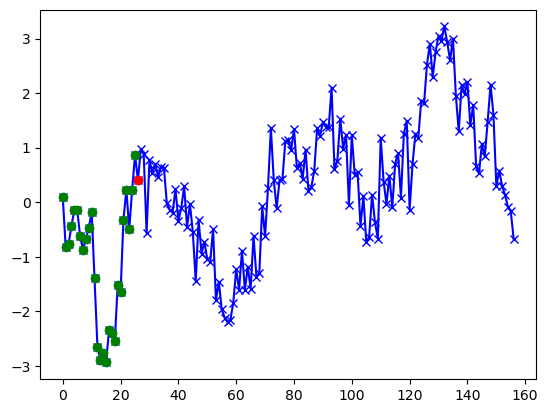

indice range: 1 26 --> 27
[[ 0.40006876]
 [ 0.86513502]
 [ 0.23095375]
 [-0.49835471]
 [ 0.23095375]
 [-0.31867001]
 [-1.65045068]
 [-1.51304474]
 [-2.54887414]
 [-2.39032883]
 [-2.34805008]
 [-2.93995259]
 [-2.77083759]
 [-2.88710415]
 [-2.65457102]
 [-1.39677817]
 [-0.18126407]
 [-0.46664564]
 [-0.6780394 ]
 [-0.86829378]
 [-0.62519096]
 [-0.13898532]
 [-0.14955501]
 [-0.43493658]
 [-0.77316659]
 [-0.81544534]] --> [0.9708319]
shape: (26, 1) --> (1,)


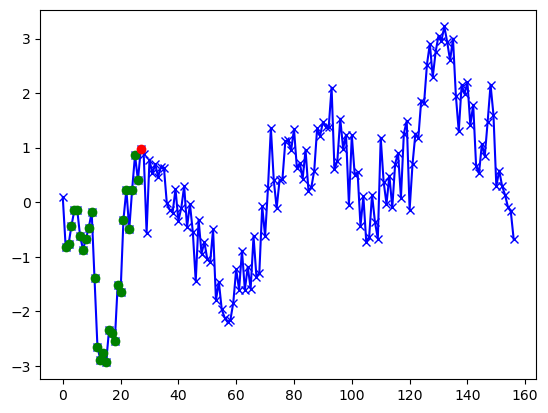

In [8]:
# Time series mini-batch function
def form_arrays(x,lookback=3,delay=1,step=1,feature_columns=[0],target_columns=[0],unique=False,verbose=False):
    # verbose=True --> report and plot for debugging
    # unique=True --> don't re-sample: 
    # x1,x2,x3 --> x4 then x4,x5,x6 --> x7 instead of x2,x3,x4 --> x5

    # initialize 
    i_start=0; count=0; 
    
    # initialize output arrays with samples 
    x_out=[]
    y_out=[]
    
    # sequentially build mini-batch samples
    while i_start+lookback+delay< x.shape[0]:
        
        # define index bounds
        i_stop=i_start+lookback
        i_pred=i_stop+delay
        
        # report if desired 
        if verbose and count<2: print("indice range:",i_start,i_stop,"-->",i_pred)

        # define arrays: 
        # method-1: buggy due to indexing from left 
        # numpy's slicing --> start:stop:step
        # xtmp=x[i_start:i_stop+1:steps]
        
        # method-2: non-vectorized but cleaner
        indices_to_keep=[]; j=i_stop
        while  j>=i_start:
            indices_to_keep.append(j)
            j=j-step

        # create mini-batch sample
        xtmp=x[indices_to_keep,:]    # isolate relevant indices
        xtmp=xtmp[:,feature_columns] # isolate desire features
        ytmp=x[i_pred,target_columns]
        x_out.append(xtmp); y_out.append(ytmp); 
        
        # report if desired 
        if verbose and count<2: print(xtmp, "-->",ytmp)
        if verbose and count<2: print("shape:",xtmp.shape, "-->",ytmp.shape)

        # PLOT FIRST SAMPLE IF DESIRED FOR DEBUGGING    
        if verbose and count<2:
            fig, ax = plt.subplots()
            ax.plot(x,'b-')
            ax.plot(x,'bx')
            ax.plot(indices_to_keep,xtmp,'go')
            ax.plot(i_pred*np.ones(len(target_columns)),ytmp,'ro')
            plt.show()
            
        # UPDATE START POINT 
        if unique: i_start+=lookback 
        i_start+=1; count+=1
        
    return np.array(x_out),np.array(y_out)

# training
L=25; S=1; D=1
Xt,Yt=form_arrays(xt,lookback=L,delay=D,step=S,feature_columns=feature_columns,target_columns=target_columns,unique=False,verbose=True)

# validation
Xv,Yv=form_arrays(xv,lookback=L,delay=D,step=S,feature_columns=feature_columns,target_columns=target_columns,unique=False,verbose=True)

In [9]:
def history_plot(history):
    FS=18   #FONT SIZE
    # PLOTTING THE TRAINING AND VALIDATION LOSS 
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# UTILITY FUNCTION
def regression_report(yt,ytp,yv,yvp):
    print("---------- Regression report ----------")
    
    print("TRAINING:")
    print(" MSE:",mean_squared_error(yt,ytp))
    print(" MAE:",mean_absolute_error(yt,ytp))
    # print(" MAPE:",mean_absolute_percentage_error(Yt,Ytp))
    
    # PARITY PLOT
    fig, ax = plt.subplots()
    ax.plot(yt,ytp,'ro')
    ax.plot(yt,yt,'b-')
    ax.set(xlabel='y_data', ylabel='y_predicted',
        title='Training data parity plot (line y=x represents a perfect fit)')
    plt.show()
    
    # PLOT PART OF THE PREDICTED TIME-SERIES
    frac_plot=1.0
    upper=int(frac_plot*yt.shape[0]); 
    # print(int(0.5*yt.shape[0]))
    fig, ax = plt.subplots()
    ax.plot(yt[0:upper],'b-')
    ax.plot(ytp[0:upper],'r-',alpha=0.5)
    ax.plot(ytp[0:upper],'ro',alpha=0.25)
    ax.set(xlabel='index', ylabel='y(t (blue=actual & red=prediction)', title='Training: Time-series prediction')
    plt.show()

      
    print("VALIDATION:")
    print(" MSE:",mean_squared_error(yv,yvp))
    print(" MAE:",mean_absolute_error(yv,yvp))
    # print(" MAPE:",mean_absolute_percentage_error(Yt,Ytp))
    
    # PARITY PLOT 
    fig, ax = plt.subplots()
    ax.plot(yv,yvp,'ro')
    ax.plot(yv,yv,'b-')
    ax.set(xlabel='y_data', ylabel='y_predicted',
        title='Validation data parity plot (line y=x represents a perfect fit)')
    plt.show()
    
    # PLOT PART OF THE PREDICTED TIME-SERIES
    upper=int(frac_plot*yv.shape[0])
    fig, ax = plt.subplots()
    ax.plot(yv[0:upper],'b-')
    ax.plot(yvp[0:upper],'r-',alpha=0.5)
    ax.plot(yvp[0:upper],'ro',alpha=0.25)
    ax.set(xlabel='index', ylabel='y(t) (blue=actual & red=prediction)', title='Validation: Time-series prediction')
    plt.show()

In [10]:
sns.set(style="whitegrid")

def history_plot(history):
    FS = 18  # Font size
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=epochs, y=loss_values, marker='o', label='Training loss')
    sns.lineplot(x=epochs, y=val_loss_values, marker='o', label='Validation loss')
    plt.title('Training and Validation Loss', fontsize=FS)
    plt.xlabel('Epochs', fontsize=FS)
    plt.ylabel('Loss', fontsize=FS)
    plt.legend()
    plt.show()

def regression_report(yt, ytp, yv, yvp):
    FS = 18  # Font size for plots
    sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.1, color_codes=True, rc=None)

    print("---------- Regression Report ----------")
    
    print("TRAINING:")
    print(" MSE:", mean_squared_error(yt, ytp))
    print(" MAE:", mean_absolute_error(yt, ytp))
    
    yt_flat = yt.flatten() if yt.ndim > 1 else yt
    ytp_flat = ytp.flatten() if ytp.ndim > 1 else ytp
    yv_flat = yv.flatten() if yv.ndim > 1 else yv
    yvp_flat = yvp.flatten() if yvp.ndim > 1 else yvp

    # Training Parity Plot
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=yt_flat, y=ytp_flat, color='magenta', alpha=0.6, edgecolor='black', marker='o')
    sns.lineplot(x=yt_flat, y=yt_flat, color='darkblue', label="y=x (Perfect fit)", linewidth=2.5)
    plt.title('Training Data Parity Plot', fontsize=FS)
    plt.xlabel('Actual Values', fontsize=FS)
    plt.ylabel('Predicted Values', fontsize=FS)
    plt.legend()
    plt.show()
    
    # Plot part of the Predicted Time-Series for Training
    plt.figure(figsize=(12, 7))
    sns.lineplot(x=np.arange(len(yt_flat)), y=yt_flat, label='Actual', color='blue', linewidth=1.2)
    sns.lineplot(x=np.arange(len(ytp_flat)), y=ytp_flat, label='Predicted', color='red', alpha=0.75, linewidth=1.2)
    plt.title('Training: Time-series Prediction', fontsize=FS)
    plt.xlabel('Time Index', fontsize=FS)
    plt.ylabel('Target Variable', fontsize=FS)
    plt.legend()
    plt.show()
    
    print("VALIDATION:")
    print(" MSE:", mean_squared_error(yv, yvp))
    print(" MAE:", mean_absolute_error(yv, yvp))
    
    # Validation Parity Plot
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=yv_flat, y=yvp_flat, color='magenta', alpha=0.6, edgecolor='black', marker='o')
    sns.lineplot(x=yv_flat, y=yv_flat, color='darkblue', label="y=x (Perfect fit)", linewidth=2.5)
    plt.title('Validation Data Parity Plot', fontsize=FS)
    plt.xlabel('Actual Values', fontsize=FS)
    plt.ylabel('Predicted Values', fontsize=FS)
    plt.legend()
    plt.show()
    
    # Plot part of the Predicted Time-Series for Validation
    plt.figure(figsize=(12, 7))
    sns.lineplot(x=np.arange(len(yv_flat)), y=yv_flat, label='Actual', color='blue', linewidth=2.5)
    sns.lineplot(x=np.arange(len(yvp_flat)), y=yvp_flat, label='Predicted', color='red', alpha=0.75, linewidth=2.5)
    plt.title('Validation: Time-series Prediction', fontsize=FS)
    plt.xlabel('Time Index', fontsize=FS)
    plt.ylabel('Target Variable', fontsize=FS)
    plt.legend()
    plt.show()



In [11]:
# RESHAPE INTO A DATA FRAME 
Xt1=Xt.reshape(Xt.shape[0],Xt.shape[1]*Xt.shape[2])
Xv1=Xv.reshape(Xv.shape[0],Xv.shape[1]*Xv.shape[2])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 25, 64)            192       
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 12, 64)            0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               76900     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                      

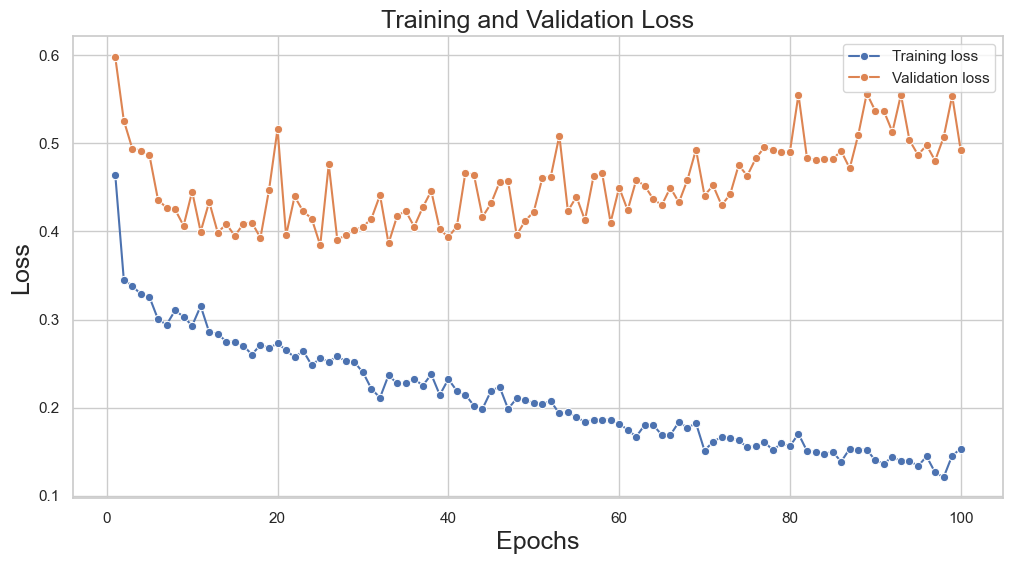

Validation Loss: 0.49210625886917114
5/5 [==============================] - 0s 3ms/step
---------- Regression Report ----------
TRAINING:
 MSE: 0.07171908468174201
 MAE: 0.20959170438474486


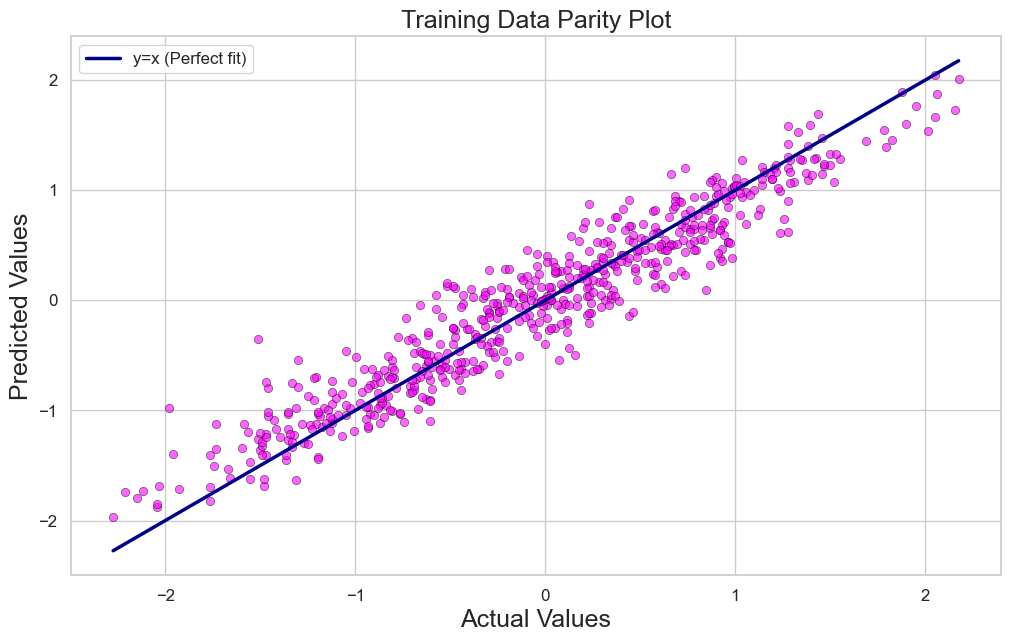

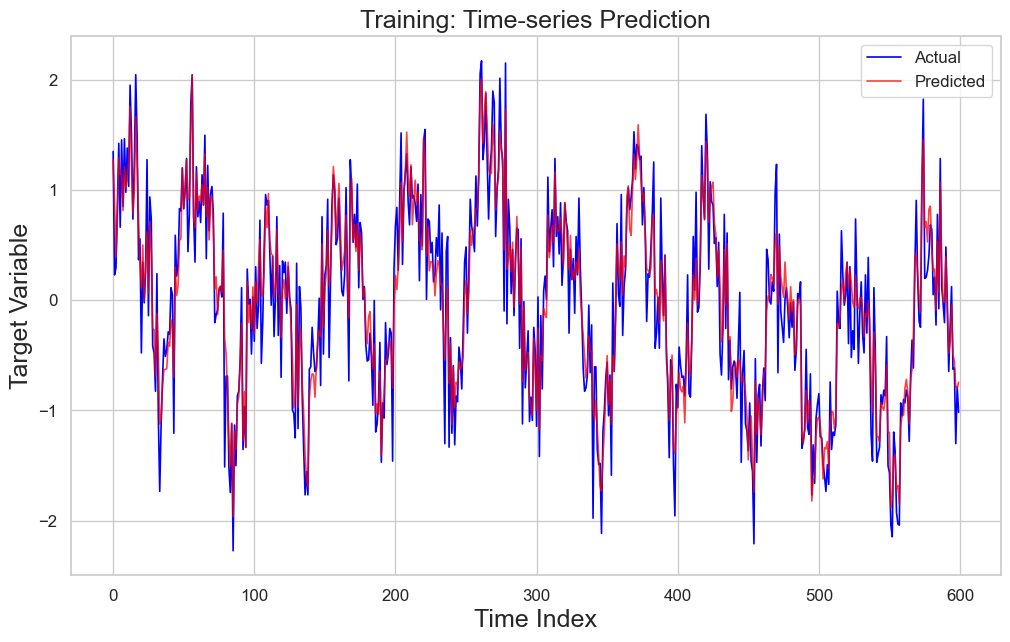

VALIDATION:
 MSE: 0.4921062404992361
 MAE: 0.5747585307059545


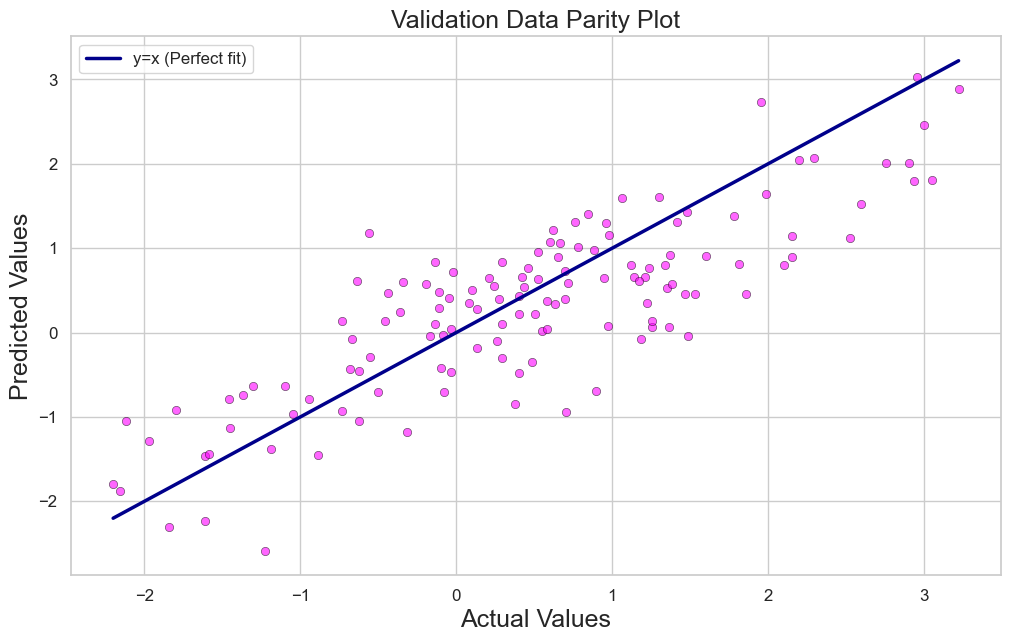

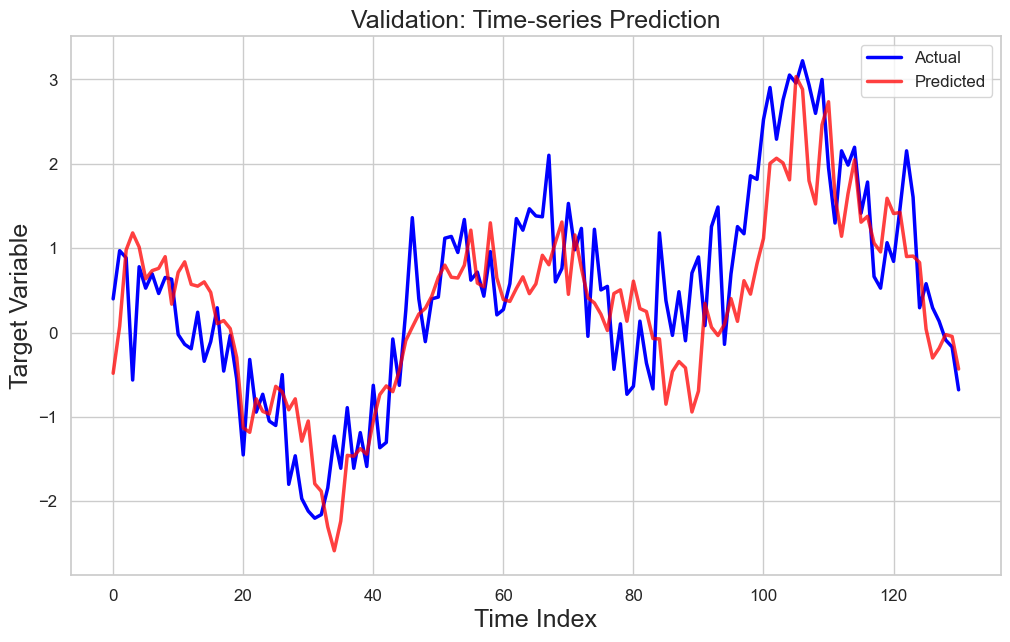

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define a more complex CNN model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(Xt.shape[1], Xt.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
print(model_cnn.summary())

# Train the model and save the training history
history = model_cnn.fit(Xt, Yt, epochs=100, batch_size=32, validation_data=(Xv, Yv))


# Visualize training history
history_plot(history)

# Evaluate the model on the validation set
validation_loss = model_cnn.evaluate(Xv, Yv, verbose=0)

# Print out the validation loss
print(f"Validation Loss: {validation_loss}")

# Predictions 
Ytp=model_cnn.predict(Xt)
Yvp=model_cnn.predict(Xv) 

# REPORT
regression_report(Yt,Ytp,Yv,Yvp)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


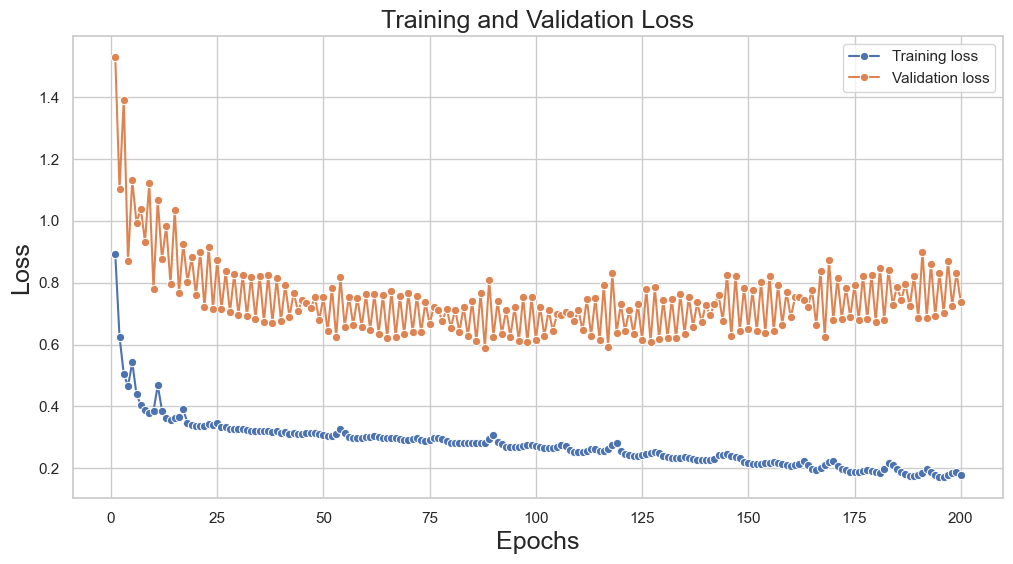

5/5 [==============================] - 0s 7ms/step
---------- Regression Report ----------
TRAINING:
 MSE: 0.16347592934049318
 MAE: 0.3182822356974762


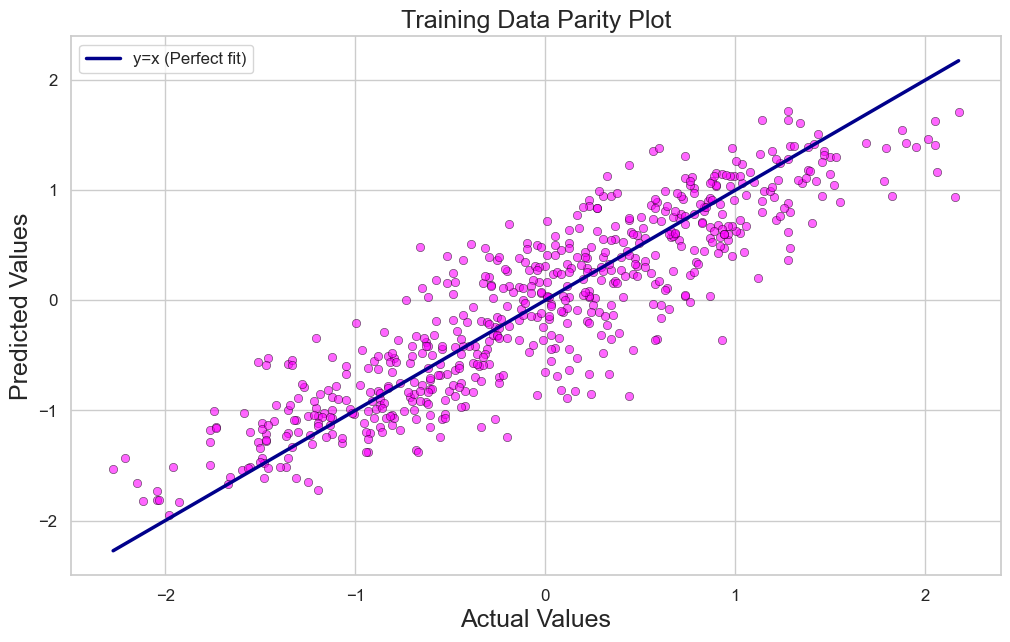

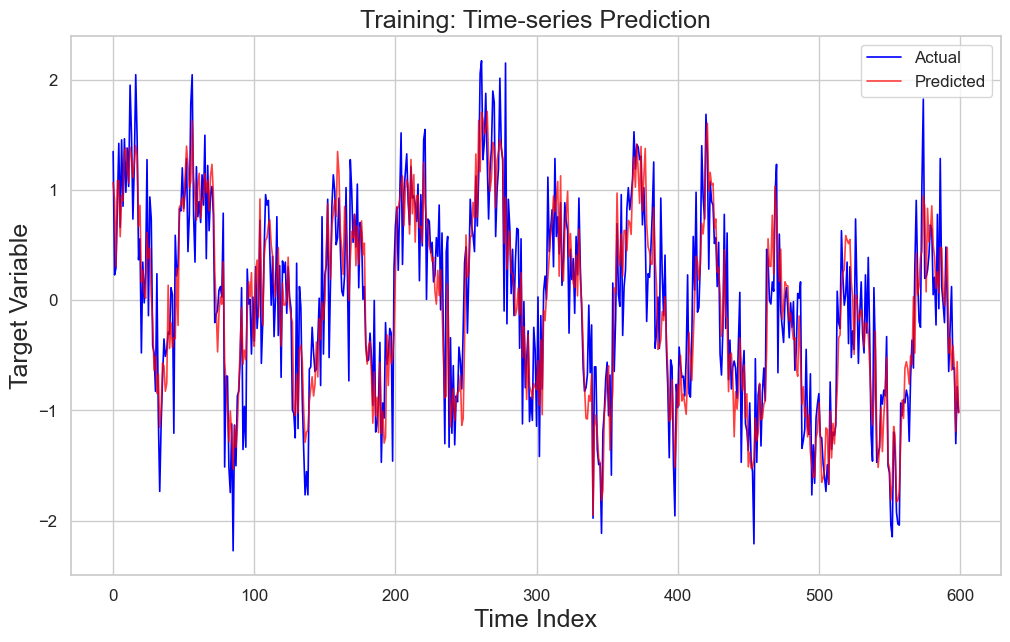

VALIDATION:
 MSE: 0.7317232022482205
 MAE: 0.678687217858636


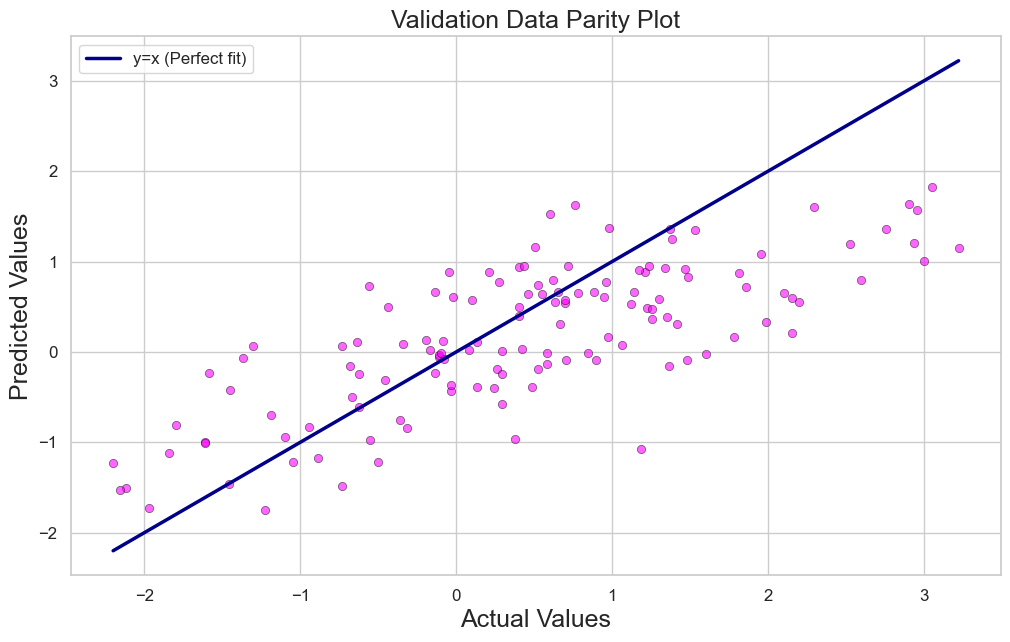

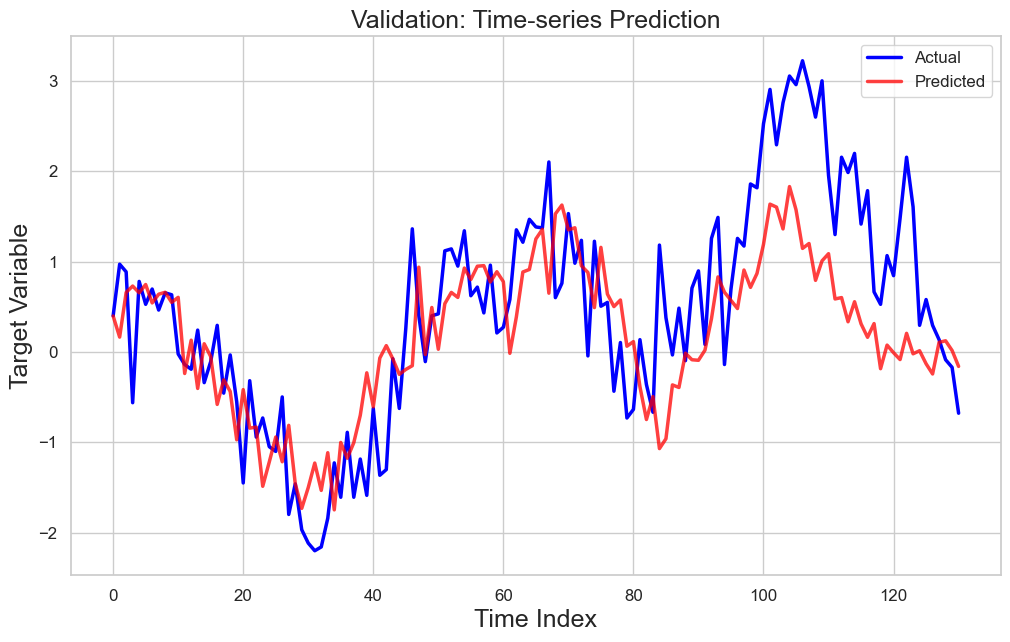

In [69]:
# # HYPERPARAMETERS 
optimizer="rmsprop"
loss_function="MeanSquaredError" 
learning_rate=0.001
numbers_epochs=200 #100
L2=1e-4
input_shape=(Xt.shape[1],Xt.shape[2])

# # batch_size=1                       # stocastic training
#batch_size=int(len(Xt1)/2.)    # mini-batch training
#batch_size = int(len(Xt1) * 0.1)
batch_size=len(Xt1)              # batch training

# BUILD MODEL
recurrent_hidden_units=64

# CREATE MODEL
model1 = keras.Sequential()

# ADD RECURRENT LAYER

# #COMMENT/UNCOMMENT TO USE RNN, LSTM,GRU
#model.add(LSTM(
#model.add(GRU(
model1.add(SimpleRNN(
units=recurrent_hidden_units,
return_sequences=False,
input_shape=input_shape, 
recurrent_regularizer=regularizers.L2(L2),
#recurrent_dropout=0.8,
activation='tanh')
          ) 
     
# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR 
model1.add(Dense(units=1, activation='linear'))

# MODEL SUMMARY
print(model1.summary()); #print(x_train.shape,y_train.shape)
# # print("initial parameters:", model.get_weights())

# # COMPILING THE MODEL 
opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
#opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
# opt = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
model1.compile(optimizer=opt, loss=loss_function)

# TRAINING YOUR MODEL
history = model1.fit(Xt,
                    Yt,
                    epochs=numbers_epochs,
                    batch_size=batch_size, verbose=False,
                    validation_data=(Xv, Yv))
# History plot
history_plot(history)

# Predictions 
Ytp=model1.predict(Xt)
Yvp=model1.predict(Xv) 

# REPORT
regression_report(Yt,Ytp,Yv,Yvp) 

RNN_e_r = sqrt(mean_squared_error(Yv, Yvp))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                12864     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


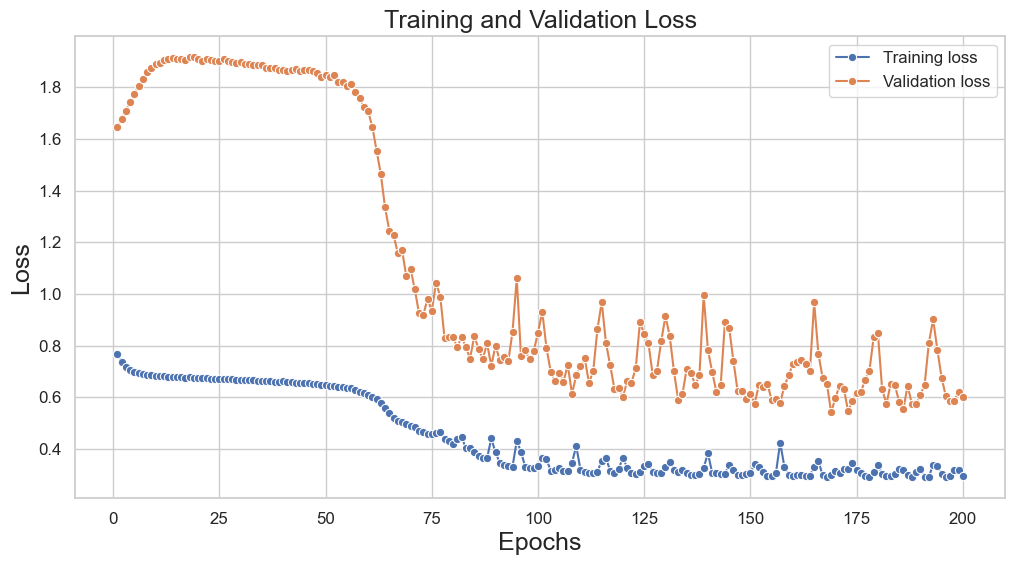

5/5 [==============================] - 0s 7ms/step
---------- Regression Report ----------
TRAINING:
 MSE: 0.2837411658105707
 MAE: 0.43380066712723003


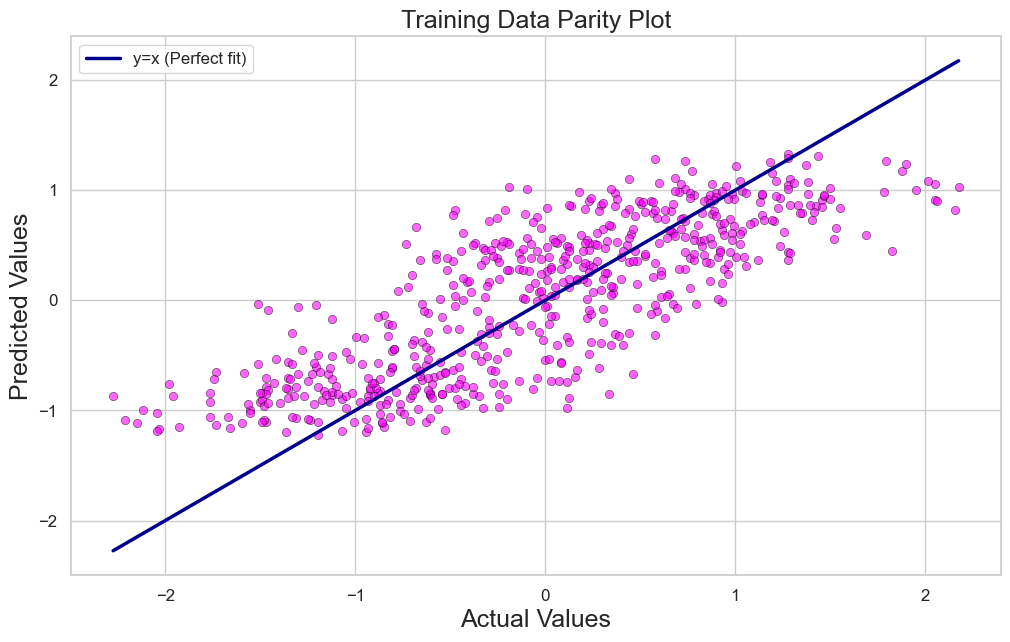

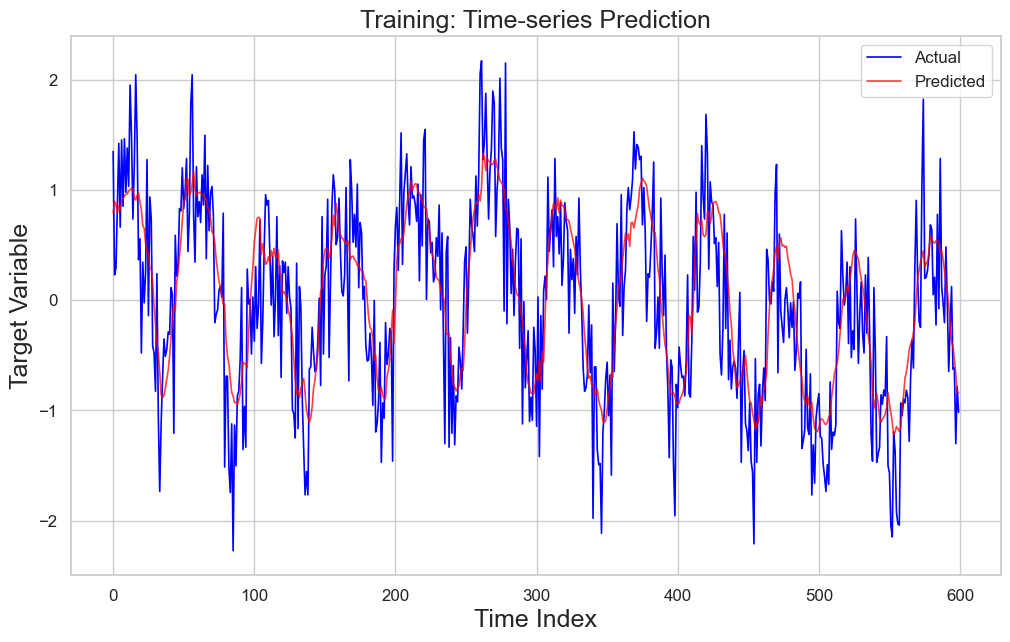

VALIDATION:
 MSE: 0.5960190966737666
 MAE: 0.6255867908968376


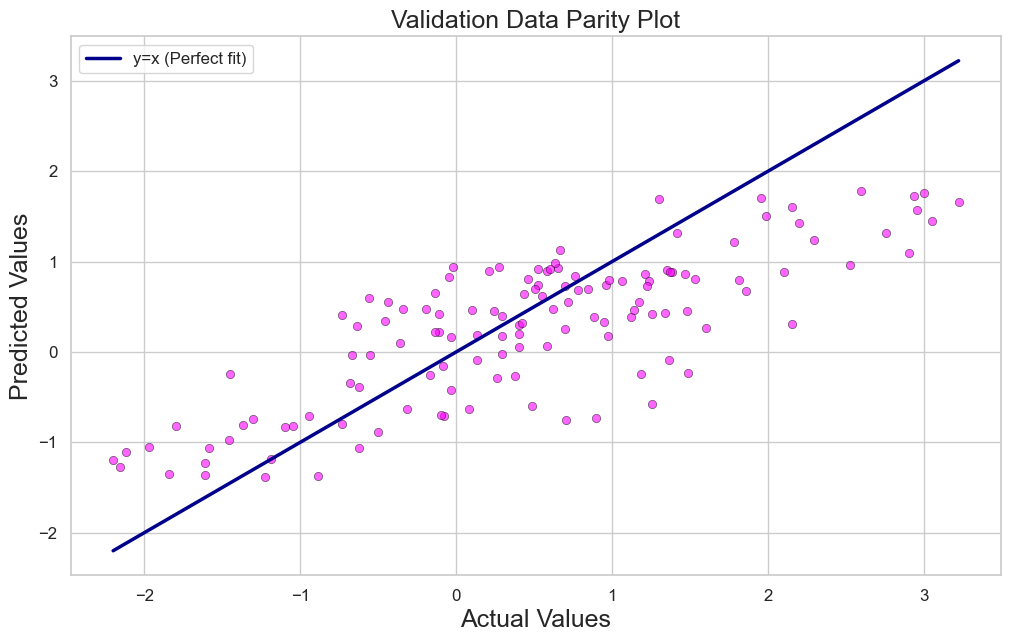

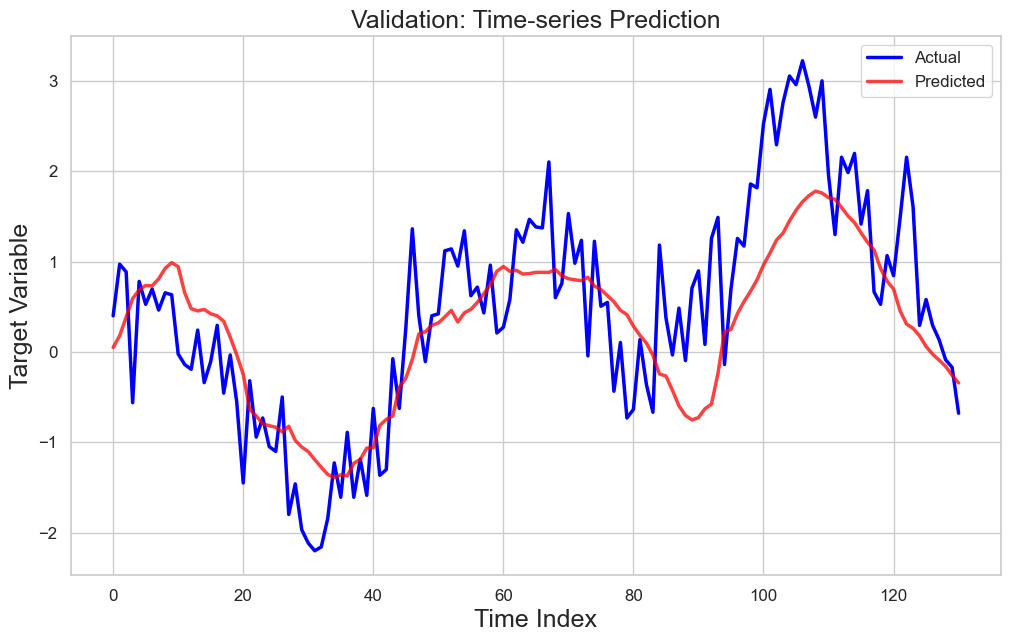

In [70]:
# # HYPERPARAMETERS 
optimizer="rmsprop"
loss_function="MeanSquaredError" 
learning_rate=0.001
numbers_epochs=200 #100
L2=1e-4
input_shape=(Xt.shape[1],Xt.shape[2])

# # batch_size=1                       # stocastic training
batch_size=int(len(Xt1)/2.)    # mini-batch training
#batch_size = int(len(Xt1) * 0.1)
# batch_size=len(Xt1)              # batch training

# BUILD MODEL
recurrent_hidden_units=64

# CREATE MODEL
model2 = keras.Sequential()

# ADD RECURRENT LAYER

# #COMMENT/UNCOMMENT TO USE RNN, LSTM,GRU
#model.add(LSTM(
model2.add(GRU(
#model.add(SimpleRNN(
units=recurrent_hidden_units,
return_sequences=False,
input_shape=input_shape, 
recurrent_regularizer=regularizers.L2(L2),
# recurrent_dropout=0.8,
activation='relu')
          ) 
     
# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR 
model2.add(Dense(units=1, activation='linear'))

# MODEL SUMMARY
print(model2.summary()); #print(x_train.shape,y_train.shape)
# # print("initial parameters:", model.get_weights())

# # COMPILING THE MODEL 
opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
model2.compile(optimizer=opt, loss=loss_function)

# TRAINING YOUR MODEL
history = model2.fit(Xt,
                    Yt,
                    epochs=numbers_epochs,
                    batch_size=batch_size, verbose=False,
                    validation_data=(Xv, Yv))
# History plot
history_plot(history)

# Predictions 
Ytp=model2.predict(Xt)
Yvp=model2.predict(Xv) 

# REPORT
regression_report(Yt,Ytp,Yv,Yvp) 
GRU_e_r = sqrt(mean_squared_error(Yv, Yvp))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


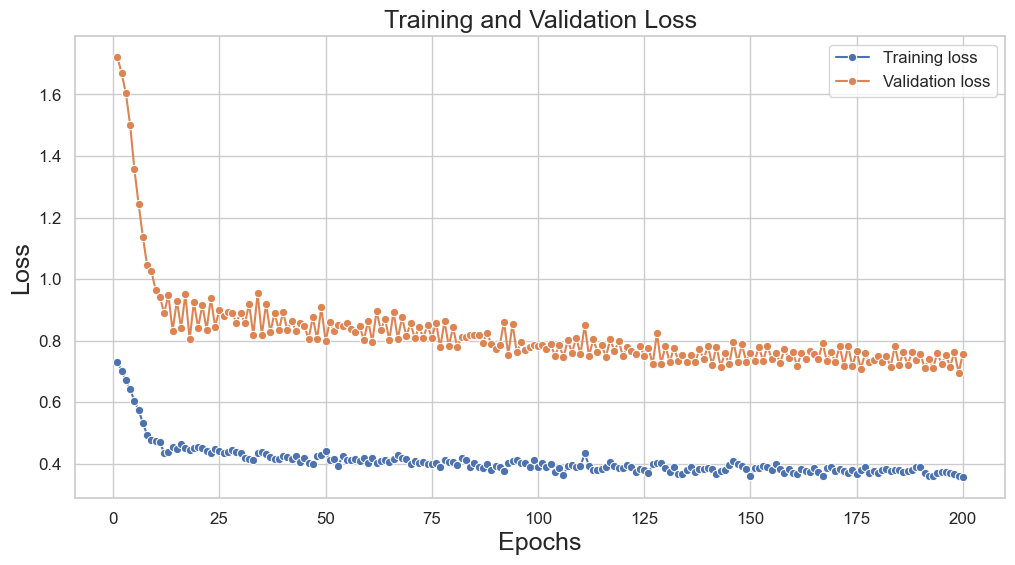

5/5 [==============================] - 0s 5ms/step
---------- Regression Report ----------
TRAINING:
 MSE: 0.3178684934679567
 MAE: 0.4576275394528377


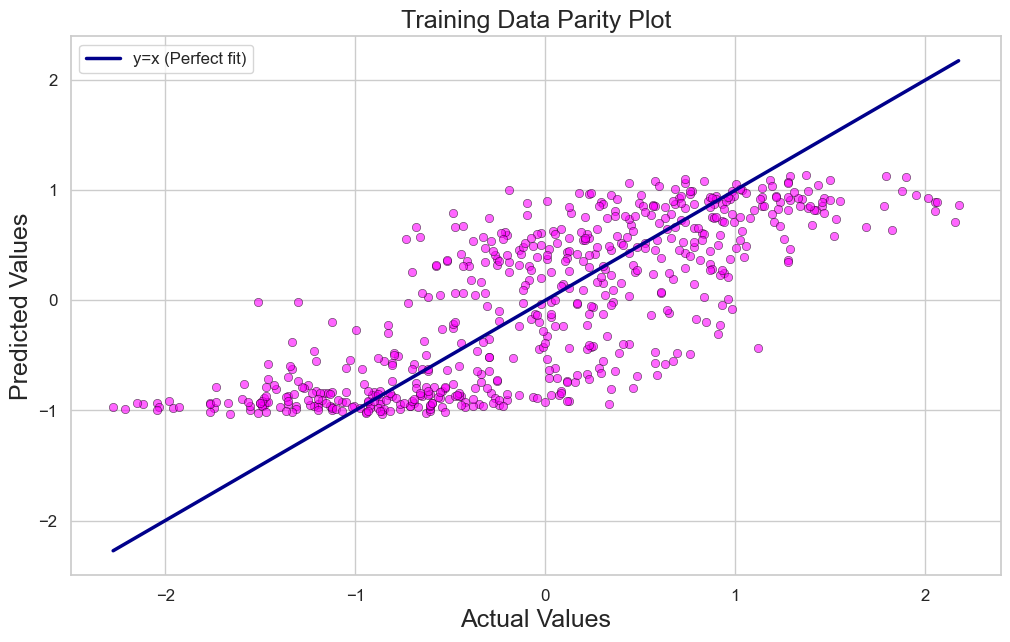

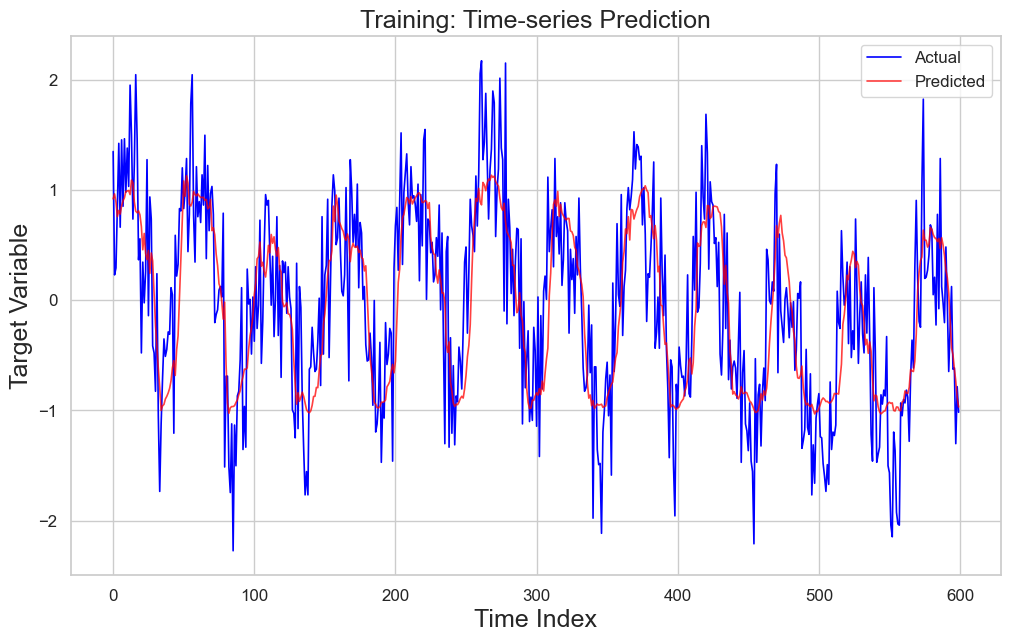

VALIDATION:
 MSE: 0.7505659471353417
 MAE: 0.6881623849303712


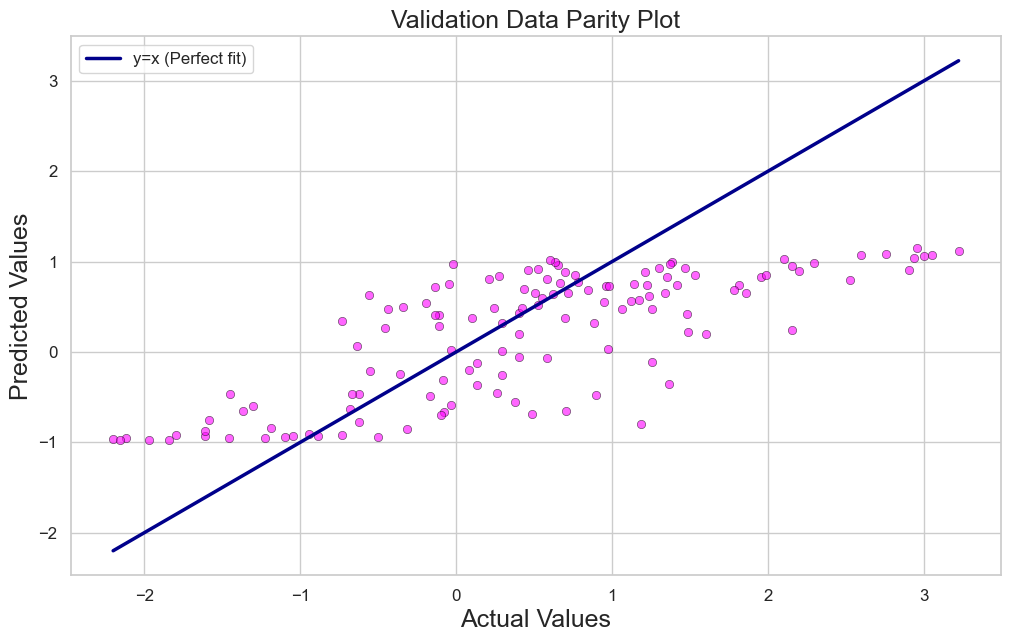

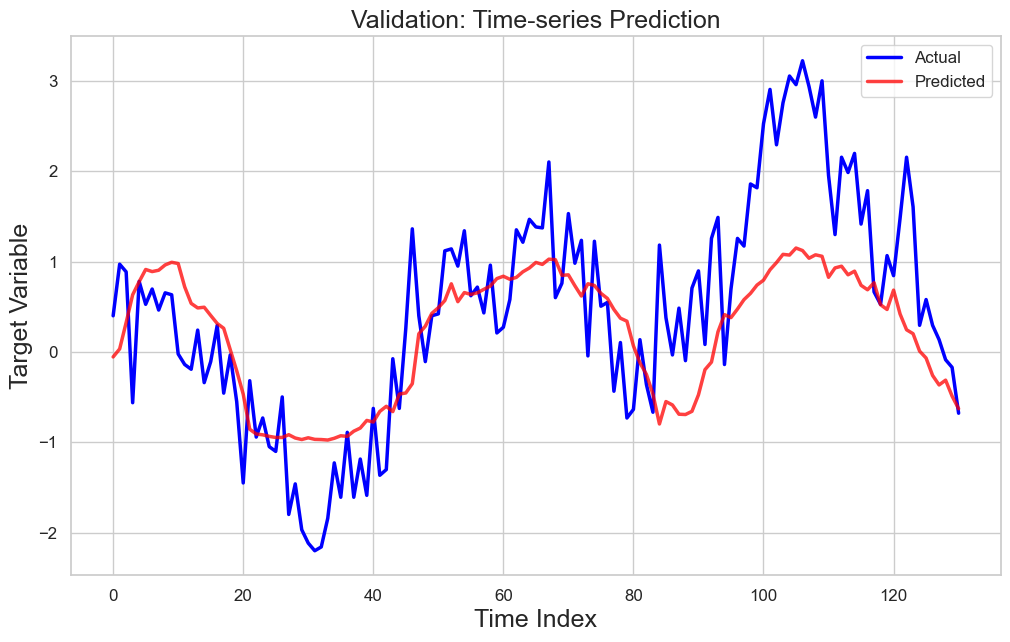

In [71]:
# # HYPERPARAMETERS 
optimizer="rmsprop"
loss_function="MeanSquaredError" 
learning_rate=0.001
numbers_epochs=200 #100
L2=1e-4
input_shape=(Xt.shape[1],Xt.shape[2])

# # batch_size=1                       # stocastic training
# # batch_size=int(len(x_train)/2.)    # mini-batch training
batch_size=len(Xt1)              # batch training

# BUILD MODEL
recurrent_hidden_units=64

# CREATE MODEL
model3 = keras.Sequential()

# ADD RECURRENT LAYER

# #COMMENT/UNCOMMENT TO USE RNN, LSTM,GRU
model3.add(LSTM(
#model.add(GRU(
#model.add(SimpleRNN(
units=recurrent_hidden_units,
return_sequences=False,
input_shape=input_shape, 
recurrent_regularizer=regularizers.L2(L2),
recurrent_dropout=0.8,
activation='tanh')
          ) 
     
# NEED TO TAKE THE OUTPUT RNN AND CONVERT TO SCALAR 
model3.add(Dense(units=1, activation='linear'))

# MODEL SUMMARY
print(model3.summary()); #print(x_train.shape,y_train.shape)
# # print("initial parameters:", model.get_weights())

# # COMPILING THE MODEL 
opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
model3.compile(optimizer=opt, loss=loss_function)

# TRAINING YOUR MODEL
history = model3.fit(Xt,
                    Yt,
                    epochs=numbers_epochs,
                    batch_size=batch_size, verbose=False,
                    validation_data=(Xv, Yv))
# History plot
history_plot(history)

# Predictions 
Ytp=model3.predict(Xt)
Yvp=model3.predict(Xv) 

# REPORT
regression_report(Yt,Ytp,Yv,Yvp) 
LSTM_e_r = sqrt(mean_squared_error(Yv, Yvp))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, 128)               33792     
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33921 (132.50 KB)
Trainable params: 33921 (132.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: 0.7361 - val_loss: 1.3730
Epoch 2/200
1/1 [==============================] - 0s 171ms/step - loss: 0.6195 - val_loss: 1.2370
Epoch 3/200
1/1 [==============================] - 0s 121ms/step - loss: 0.5522 - val_loss: 1.1350
Epoch 4/200
1/1 [=============================

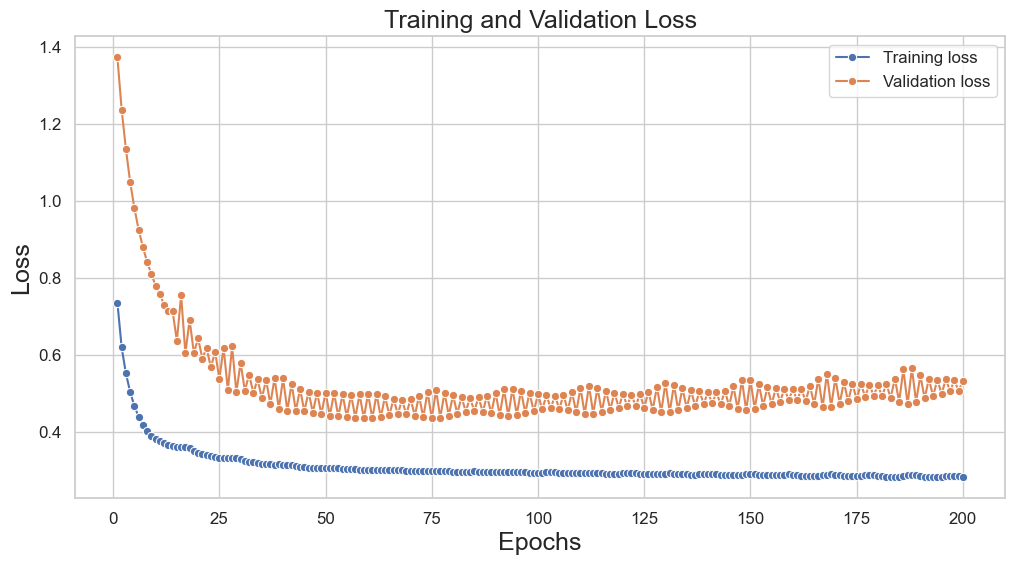

5/5 [==============================] - 0s 12ms/step
---------- Regression Report ----------
TRAINING:
 MSE: 0.28188809126142217
 MAE: 0.42825930159022013


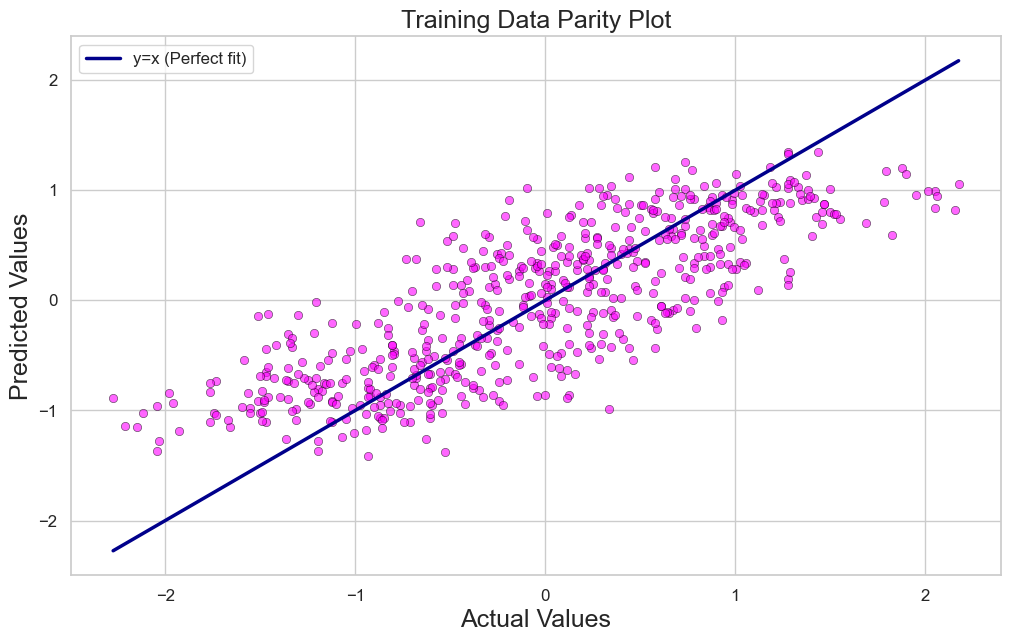

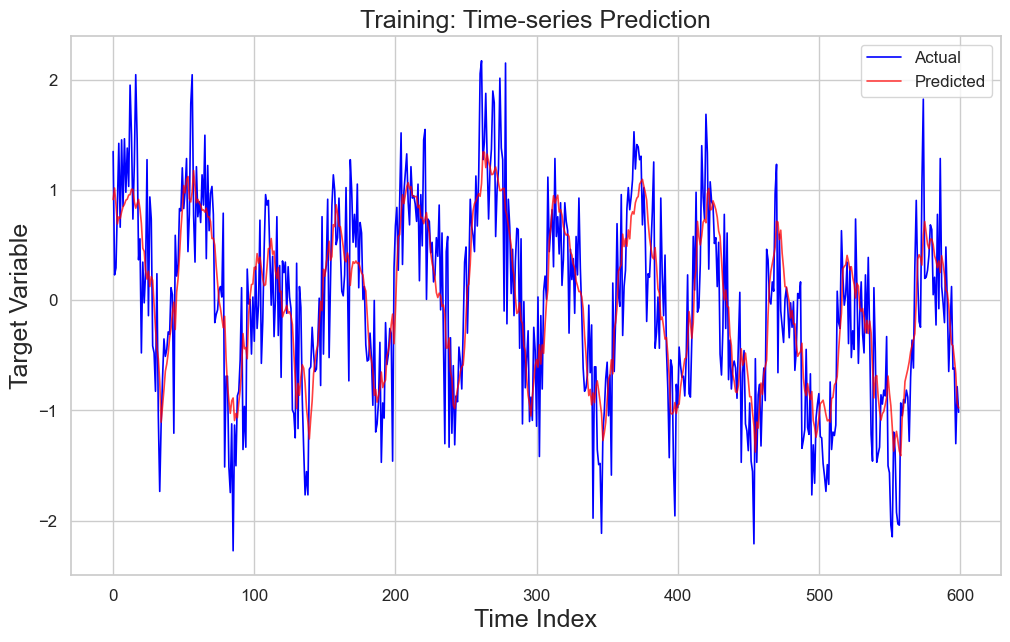

VALIDATION:
 MSE: 0.5329113452332066
 MAE: 0.5765831540312267


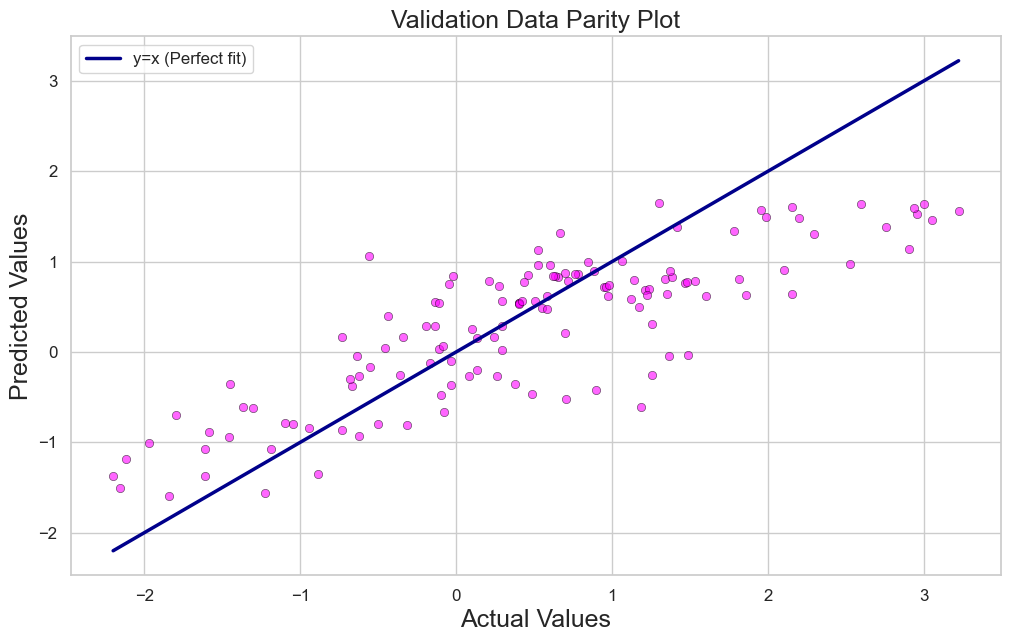

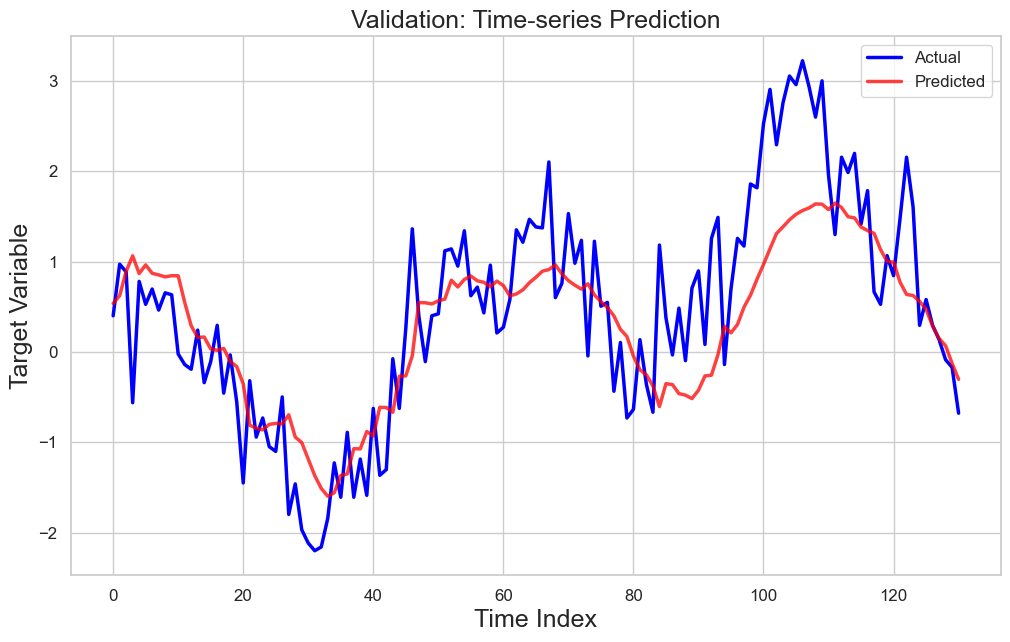

In [72]:
input_shape = (Xt.shape[1], Xt.shape[2])  # Shapes based on your feature preparation

# Define the model architecture
model_biLSTM = keras.Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape),
    Dense(1, activation='linear')
])

# Compile the model
model_biLSTM.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')

# Display the model summary to verify its structure
print(model_biLSTM.summary())

# Train the model
history_biLSTM = model_biLSTM.fit(Xt, Yt, epochs=200, batch_size=len(Xt), verbose=1, validation_data=(Xv, Yv))


# Plot training and validation loss
history_plot(history_biLSTM)

# Predict and evaluate the model
Yt_pred_biLSTM = model_biLSTM.predict(Xt)
Yv_pred_biLSTM = model_biLSTM.predict(Xv)
regression_report(Yt, Yt_pred_biLSTM, Yv, Yv_pred_biLSTM)


In [73]:
Bi = sqrt(mean_squared_error(Yv, Yv_pred_biLSTM))

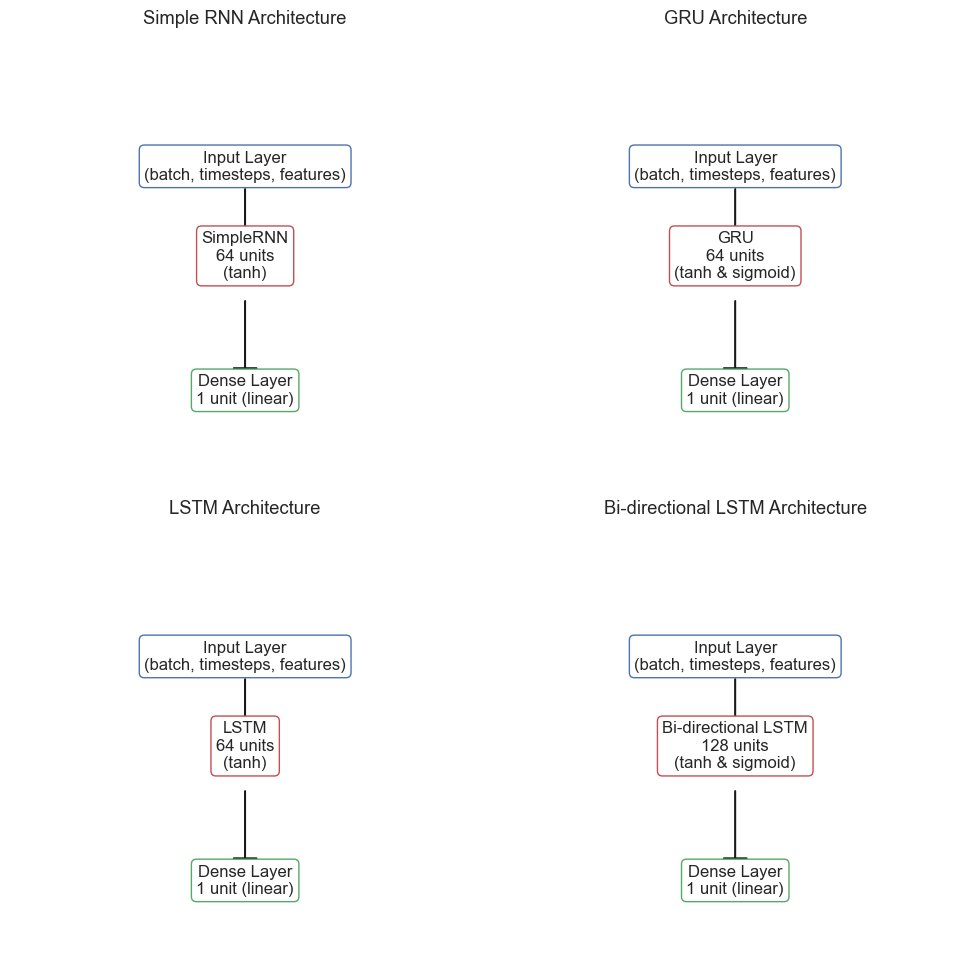

In [74]:
import matplotlib.pyplot as plt

def draw_model_diagram(ax, model_type='SimpleRNN', units=64, activation='tanh'):
    # Drawing the model layout
    if model_type == 'GRU':
        hidden_activation = 'tanh & sigmoid'  # GRU uses tanh for output modulation and sigmoid for gates.
    elif model_type == 'Bi-directional LSTM':
        hidden_activation = 'tanh & sigmoid'  # Same activations for forward and backward passes
    else:
        hidden_activation = 'tanh'  # SimpleRNN and LSTM use tanh by default for the hidden layers.

    ax.text(0.5, 0.7, 'Input Layer\n(batch, timesteps, features)', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='b', facecolor='w'))
    ax.text(0.5, 0.5, f'{model_type}\n{units} units\n({hidden_activation})', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='r', facecolor='w'))
    ax.text(0.5, 0.2, 'Dense Layer\n1 unit (linear)', ha='center', va='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='g', facecolor='w'))
    
    # Drawing arrows
    ax.arrow(0.5, 0.65, 0, -0.1, head_width=0.05, head_length=0.05, fc='k', ec='k')
    ax.arrow(0.5, 0.4, 0, -0.15, head_width=0.05, head_length=0.05, fc='k', ec='k')
    
    # Setting limits and cleaning up axes
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
draw_model_diagram(axs[0, 0], 'SimpleRNN', 64, 'tanh')
axs[0, 0].set_title('Simple RNN Architecture')
draw_model_diagram(axs[0, 1], 'GRU', 64, 'tanh & sigmoid')
axs[0, 1].set_title('GRU Architecture')
draw_model_diagram(axs[1, 0], 'LSTM', 64, 'tanh & sigmoid')
axs[1, 0].set_title('LSTM Architecture')
draw_model_diagram(axs[1, 1], 'Bi-directional LSTM', 128, 'tanh & sigmoid')
axs[1, 1].set_title('Bi-directional LSTM Architecture')

plt.tight_layout()
plt.show()

    Model      RMSE
0     RNN  0.855408
1     GRU  0.772023
2    LSTM  0.866352
3  BiLSTM  0.730008


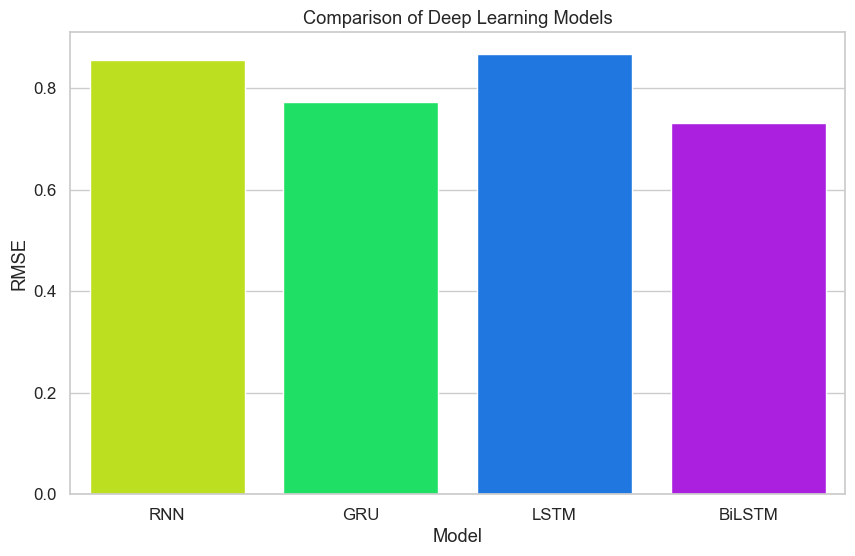

In [75]:
import seaborn as sns
# Creating a DataFrame to hold the data
data = {
    'Model': ['RNN', 'GRU', 'LSTM', 'BiLSTM'],
    'RMSE': [ RNN_e_r,  GRU_e_r, LSTM_e_r, Bi]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Set the palette to have different colors for each bar
palette = sns.color_palette("hsv", len(df))

# Plotting using seaborn
plt.figure(figsize=(10,6))
sns.barplot(y='RMSE', x='Model', data=df, palette=palette)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Deep Learning Models')
plt.show()

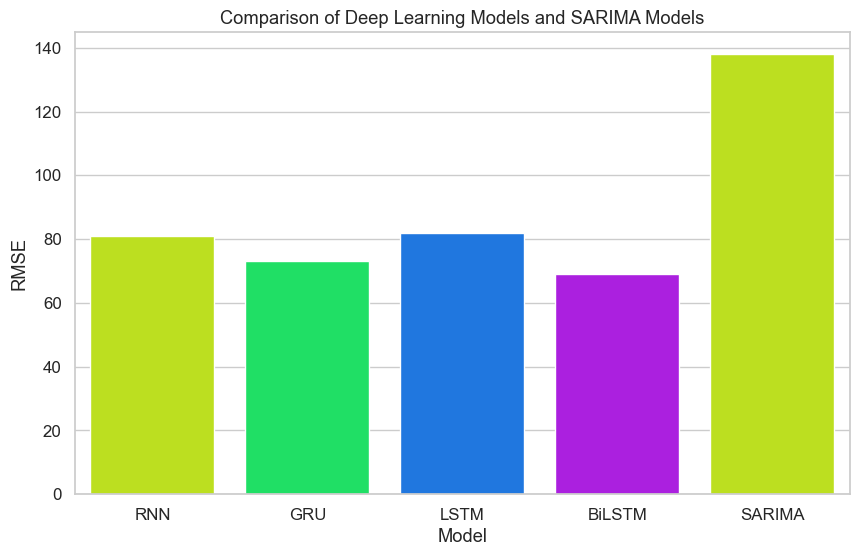

In [76]:
data = pd.read_csv("./dataset/crimedata_week.csv")
data.drop('offense_type', axis = 1)
std = np.std(data['Total_Crimes'])

# Denormalizing the RMSE for the single time series
denormalized_rmse = df['RMSE'] * std

# Update the DataFrame with denormalized RMSE
df['Denormalized RMSE'] = denormalized_rmse

s_rmse = 138
sa = {'Model': 'SARIMA', 'RMSE': s_rmse, 'Denormalized RMSE': s_rmse}

sa = pd.DataFrame([sa])

# Concatenate the new row to the existing DataFrame
df = pd.concat([df, sa], ignore_index=True)

# Plotting using seaborn
plt.figure(figsize=(10,6))
sns.barplot(y='Denormalized RMSE', x='Model', data=df, palette=palette)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Deep Learning Models and SARIMA Models')
plt.show()